In [1]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image, ImageOps
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron  # Single Neuron
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/fashion-mnist.csv')
df_labels = df.pop('label')
X_train, X_test, y_train, y_test = train_test_split(df, df_labels, test_size=0.2)
X_train.shape, X_test.shape

((8000, 784), (2000, 784))

In [3]:
clf = Perceptron(tol=1e-3)
clf.fit(X_train, y_train)
print("Perceptron accuracy: ", accuracy_score(y_test, clf.predict(X_test)))

Perceptron accuracy:  0.79


Iteration 1, loss = 11.44670108
Iteration 2, loss = 3.30877236
Iteration 3, loss = 3.27283903
Iteration 4, loss = 2.32028868
Iteration 5, loss = 1.84307242
Iteration 6, loss = 1.26536794
Iteration 7, loss = 1.25267793
Iteration 8, loss = 0.95250141
Iteration 9, loss = 1.24896007
Iteration 10, loss = 0.97631437
Iteration 11, loss = 0.94856874
Iteration 12, loss = 0.51002460
Iteration 13, loss = 0.48429190
Iteration 14, loss = 0.40588218
Iteration 15, loss = 0.36101191
Iteration 16, loss = 0.30652070
Iteration 17, loss = 0.35843992
Iteration 18, loss = 0.26268021
Iteration 19, loss = 0.18071091
Iteration 20, loss = 0.21031127
Multi-Layer Perceptron accuracy:  0.8475


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


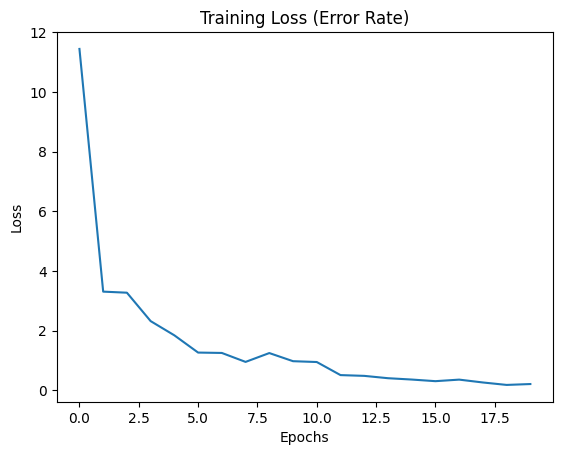

In [18]:
model = MLPClassifier(hidden_layer_sizes=(1024,256,64), max_iter=20, verbose=True)
model.fit(X_train, y_train) # Max iter means 20 passes through training data

# Evaluate the model
y_pred = model.predict(X_test)
print("Multi-Layer Perceptron accuracy: ", accuracy_score(y_test, y_pred))

plt.plot(model.loss_curve_)
plt.title('Training Loss (Error Rate)')
plt.xlabel('Epochs') # Iterations through the data
plt.ylabel('Loss')
plt.show()

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Predicted class:  Trouser


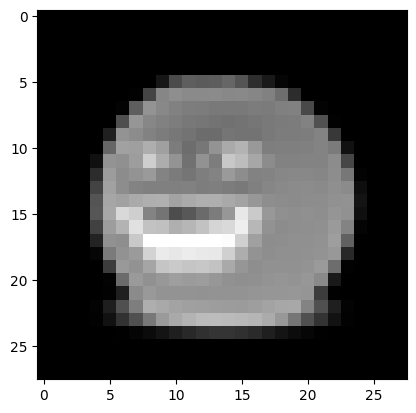

In [21]:
def predict_from_b64(b_str):
    img_data = base64.b64decode(b_str)

    # Preprocess image to match dataset
    img = Image.open(BytesIO(img_data)).convert('L') # Grayscale
    img = ImageOps.invert(img)
    img = img.resize((28,28))
    img_arr = np.array(img).reshape(-1) / 255.0  # Flatten and Normalize
    return model.predict([img_arr])[0], img

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
b64_str = input("Input the base64 string of that image (bit.ly/b64encode): ")
prediction, image = predict_from_b64(b64_str)
print("Predicted class: ", classes[prediction])

plt.imshow(image, cmap='gray')
plt.show()